In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
from shapely.geometry import Point
import matplotlib.pyplot as plt
import osmnx as ox
import contextily as ctx
from shapely import wkt

In [4]:
df = pd.read_csv("sensor-location.csv", sep=';')

df[['latitude', 'longitude']] = df['Lat/Long'].str.split(',', expand=True)
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

df.head()

,Objectummer,Locatienaam,Lat/Long,Breedte,Effectieve breedte,latitude,longitude
0,CMSA-GAKH-01,Kalverstraat t.h.v. 1,"52.372634, 4.892071",8,"6,7",52.372634,4.892071
1,CMSA-GAWW-11,Korte Niezel,"52.374616, 4.899830","3,8","3,4",52.374616,4.899830
2,CMSA-GAWW-12,Oudekennissteeg,"52.373860, 4.898690",3,"2,6",52.373860,4.898690
3,CMSA-GAWW-13,Stoofsteeg,"52.372439, 4.897689","2,6","2,2",52.372439,4.897689
4,CMSA-GAWW-14,Oudezijds Voorburgwal t.h.v. 91,"52.373538, 4.898166",4,"3,6",52.373538,4.898166


In [ ]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

,Objectummer,Locatienaam,Lat/Long,Breedte,Effectieve breedte,latitude,longitude,geometry
0,CMSA-GAKH-01,Kalverstraat t.h.v. 1,"52.372634, 4.892071",8,"6,7",52.372634,4.892071,POINT (4.89207 52.37263)
1,CMSA-GAWW-11,Korte Niezel,"52.374616, 4.899830","3,8","3,4",52.374616,4.899830,POINT (4.89983 52.37462)
2,CMSA-GAWW-12,Oudekennissteeg,"52.373860, 4.898690",3,"2,6",52.373860,4.898690,POINT (4.89869 52.37386)
3,CMSA-GAWW-13,Stoofsteeg,"52.372439, 4.897689","2,6","2,2",52.372439,4.897689,POINT (4.89769 52.37244)
4,CMSA-GAWW-14,Oudezijds Voorburgwal t.h.v. 91,"52.373538, 4.898166",4,"3,6",52.373538,4.898166,POINT (4.89817 52.37354)


In [ ]:
zones = pd.read_csv("Sail plekken Zones.csv")
zones['geometry'] = zones['WKT'].apply(wkt.loads)
gdf_zones = gpd.GeoDataFrame(zones, geometry='geometry', crs="EPSG:4326")

color_map = {
    "Green Zone: Sustainability & Innovation": "green",
    "White zone: Party of meeting": "white",
    "Red zone: Sail's Cultural Living Room": "red",
    "Orange Zone: The Nautical Heart of Sail": "orange"
}

gdf_zones['color'] = gdf_zones['naam'].map(color_map)

gdf_zones = gdf_zones.to_crs(epsg=3857)

gdf_zones.head()

,WKT,naam,beschrijving,geometry,color
0,"POLYGON ((4.8764794 52.4087376, 4.8756211 52.4...",Green Zone: Sustainability & Innovation,NaN,"POLYGON ((542847.204 6874370.565, 542751.658 6...",green
1,"POLYGON ((4.908572 52.3933821, 4.8964699 52.39...",White zone: Party of meeting,NaN,"POLYGON ((546419.736 6871568.925, 545072.536 6...",white
2,"POLYGON ((4.9238479 52.3743937, 4.914664 52.37...",Red zone: Sail's Cultural Living Room,NaN,"POLYGON ((548120.241 6868105.802, 547097.894 6...",red
3,"POLYGON ((4.8957519 52.3795637, 4.9005584 52.3...",Orange Zone: The Nautical Heart of Sail,NaN,"POLYGON ((544992.609 6869048.564, 545527.666 6...",orange


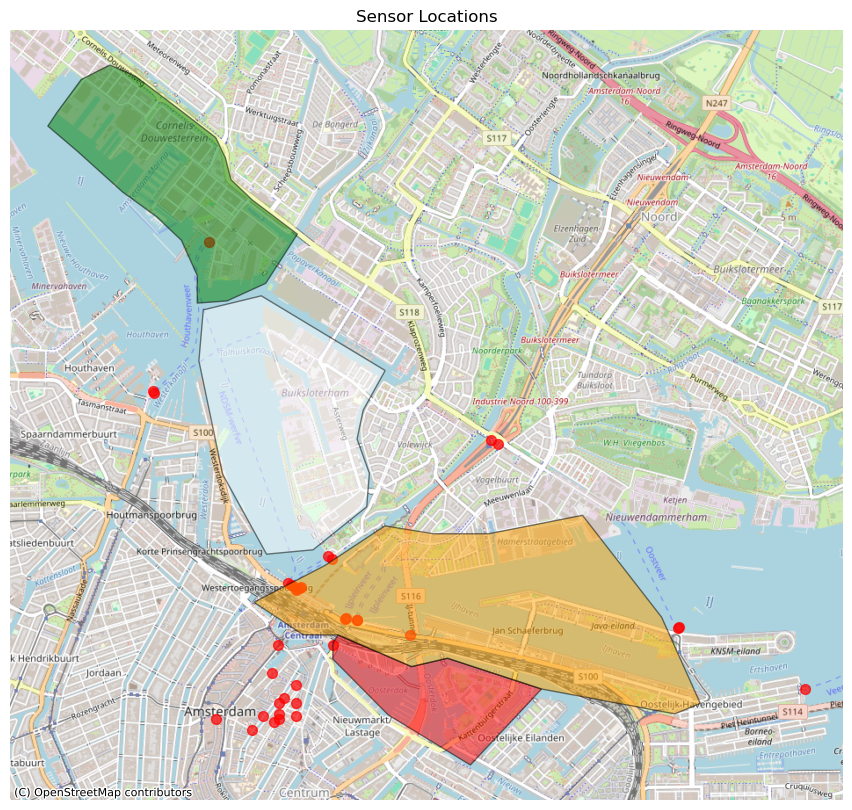

In [ ]:
city = "Amsterdam, Netherlands"
gdf_city = ox.geocode_to_gdf(city).to_crs(epsg=3857)

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(ax=ax, color='red', markersize=50, alpha=0.7)

gdf_zones.plot(ax=ax, color=gdf_zones['color'], alpha=0.5, edgecolor='black', linewidth=1)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
plt.title("Sensor Locations")

plt.savefig(
    "sensormap.png",
    dpi=300,
    bbox_inches='tight',
    pad_inches=0
)

plt.show()